# Application Development Summative ML model for Solar generation

<div class="alert alert-block alert-info">
</b> Submitted by Hemal D. Patel</div>

### Objective

To Create a simple ML model application which accepts suitable inputs and gives a predicted power output for each power generation plant for any day within the next 7 days.

One for each genaration plant shall be created. 

The ML models shall be of Multiple Linear Regresssion.

### Load the data

Import the necessary libraries and load the data. Once loaded, investigate the data.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import os
import matplotlib.pyplot as pyplot

%matplotlib inline

In [2]:
# # confirm the path from which the data files shall be loaded;
# os.getcwd()

Load the monthly maintainance schedule and Annual Generation data files for both generation plants

In [3]:
# # Solar Monthly Maintenance schedule;
# # solar_monthly_schedule=pd.read_csv('solar_farm.csv') # load data description csv file on to a pandas data frame.

# solar_monthly_schedule=pd.read_csv('solar_farm.csv', skiprows=1) # load csv file on to a pandas data frame. One Errenous row is
# # skipped
# solar_monthly_schedule

In [4]:
# # Solar annual generation data;
# solar_annual_gen=pd.read_csv('solar_generation_data.csv') # load csv file on to a pandas data frame
# solar_annual_gen

In [5]:
# # Remove the special character "°" and Convert Hi and low temp into floats

# solar_annual_gen_temp=solar_annual_gen[["Temp Hi","Temp Low"]].replace('\°','',regex=True).astype(float)
# solar_annual_gen_temp.columns = ['Temp Hi(float)','Temp Low(Float)']
# solar_annual_gen_temp

In [6]:
# # Solar annual generation data;
# solar_annual_gen=pd.read_csv('solar_generation_data.csv') # load csv file on to a pandas data frame
# solar_annual_gen

In [7]:
#  Merging high and low to original data frame
# # solar_annual_gen = solar_annual_gen.merge(salaryDfObj, left_index=True, right_index=True)

# # solar_annual_gen = pd.merge(solar_annual_gen, solar_annual_gen_temp, on=index, how='left')

# solar_annual_gen = pd.merge(solar_annual_gen, solar_annual_gen_temp, right_index=True, left_index=True)
# solar_annual_gen

### Explore the data

In [8]:
# solar_annual_gen.describe() # summary statistics for all features or attributes
# # data.describe() # summary statistics for features or attributes

In [9]:
# solar_annual_gen.info() # View of data types and count of val.

In [10]:
# #  Check for missing val
# solar_annual_gen.isna().sum()

In [11]:
# # Visualization of the features using Histogram
# pd.DataFrame.hist(solar_annual_gen, figsize=(10,10)); # Histogram plots help to visualize the distribution characteristics. Very 
# # few column values are normally distributed and therefore imputing missing values with median is preffered to reduce bias
# # as a result of skewness or outliers

In [12]:
# # Impute missing values with median i.e. Rainfall in mm with 53 missing value can be replaced with the median value (0) 
# # imputing missing values with median is preffered to reduce bias as a result of skewness or outliers

# solar_annual_gen["Rainfall in mm" ].fillna(solar_annual_gen["Rainfall in mm" ].median(), inplace=True) 

# # Recheck for missing values
# print(solar_annual_gen.isna().sum())  # view columns with NaN or missing values
# print("\nNo. of columns containing atleast a null value=",len(solar_annual_gen.columns[solar_annual_gen.isna().any()]))
# # solar_annual_gen.info()

In [13]:
# # Using pickling to save the cleaned data frame

# import pickle

# fileObj = open('data.obj', 'wb')
# pickle.dump(solar_annual_gen,fileObj)
# fileObj.close()

In [14]:
#  Using pickling the cleaned data can be loaded
import pickle   

fileObj = open('data.obj', 'rb')
solar_annual_gen = pickle.load(fileObj)
fileObj.close()
solar_annual_gen

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW,Temp Hi(float),Temp Low(Float)
0,Jan,1,109°,85°,30.0,9,0.0,9.93,109.0,85.0
1,Jan,2,106°,71°,30.1,9,0.0,9.97,106.0,71.0
2,Jan,3,106°,81°,29.5,9,0.0,9.77,106.0,81.0
3,Jan,4,102°,83°,13.0,4,0.0,4.30,102.0,83.0
4,Jan,5,105°,80°,30.1,9,0.0,9.97,105.0,80.0
...,...,...,...,...,...,...,...,...,...,...
360,Dec,27,101°,83°,26.4,8,0.0,8.74,101.0,83.0
361,Dec,28,102°,84°,25.8,8,0.0,8.54,102.0,84.0
362,Dec,29,104°,83°,26.9,8,0.0,8.91,104.0,83.0
363,Dec,30,105°,80°,25.1,8,0.0,8.31,105.0,80.0


In [15]:
solar_annual_gen.describe()  # Summary statistics

,Day,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW,Temp Hi(float),Temp Low(Float)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,15.720548,22.615068,6.972603,2.339726,7.488192,91.687671,66.635616
std,8.808321,5.311600,1.699811,15.256405,1.759069,10.281531,10.750484
min,1.000000,1.500000,1.000000,0.000000,0.500000,66.000000,43.000000
25%,8.000000,18.500000,6.000000,0.000000,6.130000,83.000000,58.000000
50%,16.000000,22.800000,7.000000,0.000000,7.550000,93.000000,68.000000
75%,23.000000,27.000000,9.000000,0.000000,8.940000,99.000000,75.000000
max,31.000000,30.200000,9.000000,161.500000,10.000000,111.000000,94.000000


In [16]:
solar_annual_gen.info() # Data types and view count of values. Also missing values can be determined (missing values were already
# imputed earlier)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   365 non-null    object 
 1   Day                     365 non-null    int64  
 2   Temp Hi                 365 non-null    object 
 3   Temp Low                365 non-null    object 
 4   Solar                   365 non-null    float64
 5   Cloud Cover Percentage  365 non-null    int64  
 6   Rainfall in mm          365 non-null    float64
 7   Power Generated in MW   365 non-null    float64
 8   Temp Hi(float)          365 non-null    float64
 9   Temp Low(Float)         365 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 28.6+ KB


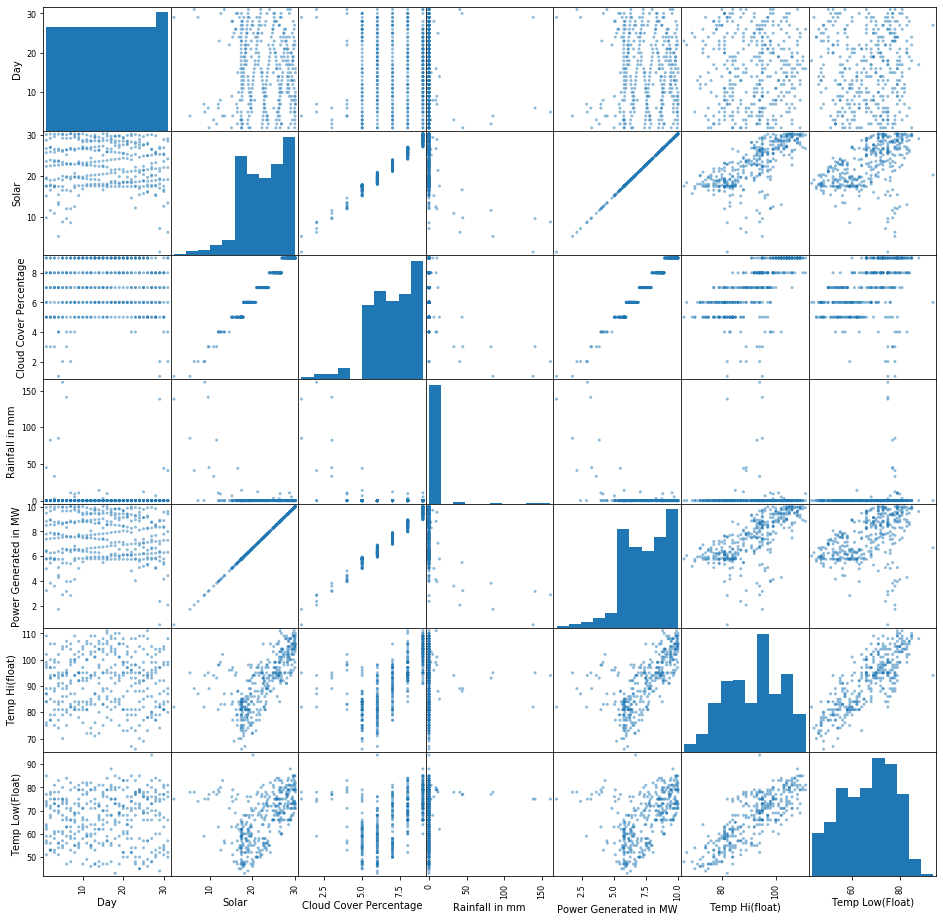

In [17]:
# Visualize the relationships between features

scatter_matrix(solar_annual_gen, figsize=(16,16));

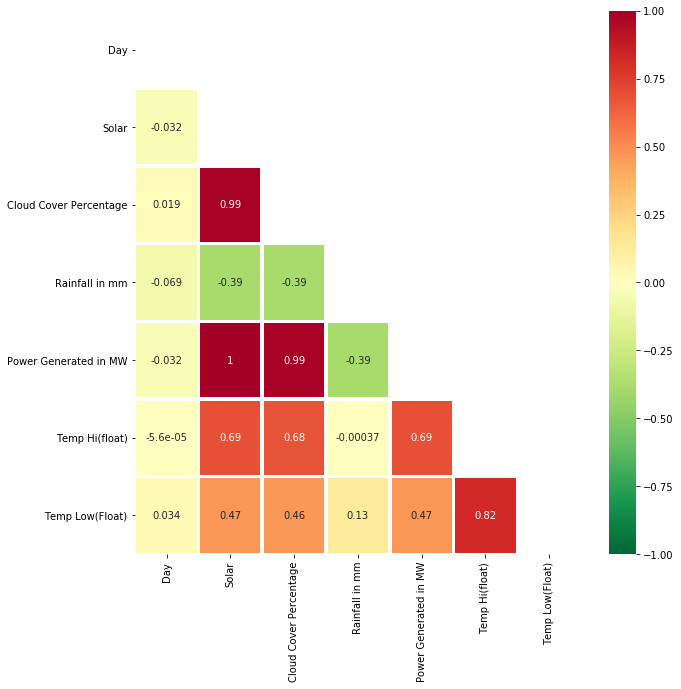

In [18]:
# Heatmap plot for viewing strength of corelations
plt.figure(figsize=(10,10))
corr_df = solar_annual_gen.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr_df, cmap='RdYlGn_r',annot = True);

sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5, annot = True);

# At a glance it is possible to see there is strong positive (dark red color) and medium negative (green color) 
# corelations amongst some variables


In [19]:
solar_annual_gen.insert(0, "Year", 2015) # An arbitrary year is selected since it is unknown and the column is created 

In [20]:
solar_annual_gen.head()

,Year,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW,Temp Hi(float),Temp Low(Float)
0,2015,Jan,1,109°,85°,30.0,9,0.0,9.93,109.0,85.0
1,2015,Jan,2,106°,71°,30.1,9,0.0,9.97,106.0,71.0
2,2015,Jan,3,106°,81°,29.5,9,0.0,9.77,106.0,81.0
3,2015,Jan,4,102°,83°,13.0,4,0.0,4.30,102.0,83.0
4,2015,Jan,5,105°,80°,30.1,9,0.0,9.97,105.0,80.0


In [21]:
# Combining the three date strings (day,month and year)
solar_annual_gen['Full Date']=solar_annual_gen['Day'].map(str)+solar_annual_gen['Month '] +solar_annual_gen['Year'].map(str)
solar_annual_gen


,Year,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW,Temp Hi(float),Temp Low(Float),Full Date
0,2015,Jan,1,109°,85°,30.0,9,0.0,9.93,109.0,85.0,1Jan2015
1,2015,Jan,2,106°,71°,30.1,9,0.0,9.97,106.0,71.0,2Jan2015
2,2015,Jan,3,106°,81°,29.5,9,0.0,9.77,106.0,81.0,3Jan2015
3,2015,Jan,4,102°,83°,13.0,4,0.0,4.30,102.0,83.0,4Jan2015
4,2015,Jan,5,105°,80°,30.1,9,0.0,9.97,105.0,80.0,5Jan2015
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015,Dec,27,101°,83°,26.4,8,0.0,8.74,101.0,83.0,27Dec2015
361,2015,Dec,28,102°,84°,25.8,8,0.0,8.54,102.0,84.0,28Dec2015
362,2015,Dec,29,104°,83°,26.9,8,0.0,8.91,104.0,83.0,29Dec2015
363,2015,Dec,30,105°,80°,25.1,8,0.0,8.31,105.0,80.0,30Dec2015


In [22]:
# Converting the date string to datetime data type 
solar_annual_gen['Full Date'] = pd.to_datetime(solar_annual_gen['Full Date'], format='%d%b%Y', errors='coerce')
print(solar_annual_gen.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Year                    365 non-null    int64         
 1   Month                   365 non-null    object        
 2   Day                     365 non-null    int64         
 3   Temp Hi                 365 non-null    object        
 4   Temp Low                365 non-null    object        
 5   Solar                   365 non-null    float64       
 6   Cloud Cover Percentage  365 non-null    int64         
 7   Rainfall in mm          365 non-null    float64       
 8   Power Generated in MW   365 non-null    float64       
 9   Temp Hi(float)          365 non-null    float64       
 10  Temp Low(Float)         365 non-null    float64       
 11  Full Date               365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), object

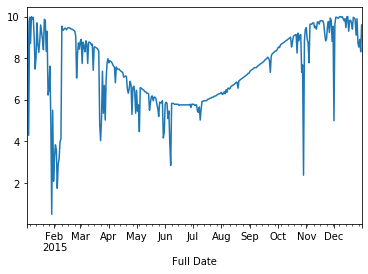

In [23]:
# Plotting of time series
from pandas import Series

ts = Series(solar_annual_gen['Power Generated in MW'].values, solar_annual_gen['Full Date'] ) 
plt = ts[1:1000].plot()
pyplot.show(plt)

#  From the time series plot the solar generation drops mid year and peaks during the start and end of the year

### Split dataset into predictor and target matrices & Create model and save using pickling

In [24]:
from sklearn import model_selection

# Split dataset into predictor and target matrices
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',]

solar_annual_gen_numeric = solar_annual_gen.select_dtypes(include=numerics) # Include only numeric data types

# solar_annual_gen_X 
# Values of target
y = solar_annual_gen_numeric['Power Generated in MW'].values

# Values of attributes
solar_annual_gen_X = solar_annual_gen_numeric.drop(['Power Generated in MW','Day', 'Year'], axis=1) # Drop the target value and 
# string data type variables
X = solar_annual_gen_X.values
print('Target Values y=',y[:10]) # View first 10 Target values
print('\nAttribute Values X=',X[:3]) # view of 3no. rows of Attribute Values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)# Use test size of 25% for better
# performance

Target Values y= [ 9.93  9.97  9.77  4.3   9.97  8.71 10.    9.87  9.97  8.97]

Attribute Values X= [[ 30.    9.    0.  109.   85. ]
 [ 30.1   9.    0.  106.   71. ]
 [ 29.5   9.    0.  106.   81. ]]


In [25]:
# Fit the model on training set
# solarmodel = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)
# solarmodel.fit(X_train, y_train)

In [26]:
# # Save Model Using Pickle

# import pickle

# fileObj = open('solar_model.obj', 'wb')
# pickle.dump(solarmodel,fileObj)
# fileObj.close()

In [27]:
# use pickling to load the solar model from the object file
import pickle   

fileObj = open('solar_model.obj', 'rb')
solarmodel = pickle.load(fileObj)
fileObj.close()
solarmodel

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [28]:
# Predict
y_pred = solarmodel.predict(X_test)
y_pred

array([7.114531, 7.861008, 9.438879, 7.618513, 8.444729, 9.899333,
       7.780436, 9.699315, 7.120707, 9.996456, 6.48003 , 6.043475,
       8.049281, 8.971493, 7.328421, 6.289758, 8.253658, 7.484253,
       6.52666 , 6.125455, 5.79114 , 6.038497, 8.771227, 9.122702,
       8.850271, 7.70453 , 8.765487, 8.771625, 6.850712, 5.915787,
       6.576036, 7.414051, 8.770597, 4.014056, 9.074208, 8.69657 ,
       8.904687, 6.318926, 7.861176, 8.289653, 6.193108, 9.394946,
       6.374621, 7.989418, 9.854591, 8.90898 , 6.248456, 6.288798,
       7.134781, 8.843743, 5.759874, 6.558985, 7.034291, 5.789947,
       7.854997, 7.039919, 9.349469, 5.86677 , 8.017884, 8.522415,
       8.952136, 8.337413, 9.854467, 7.483966, 9.53782 , 9.971688,
       8.253124, 5.759805, 6.560489, 5.828086, 8.532406, 5.759452,
       6.719572, 9.150546, 8.53004 , 7.297243, 8.741265, 9.72261 ,
       7.42762 , 9.248485, 9.829493, 5.10192 , 5.869726, 9.394409,
       8.527337, 9.997604, 9.64009 , 6.150246, 8.271656, 8.771

### Evaluate the results

Using the `sklearn.metrics` moduel determine the accuracy score, i.e., the coefficient of determination $R^2$ of the prediction.

In [29]:
# Score
print('\nModel train set Score=',solarmodel.score(X_train, y_train))
print('\nModel test set Score=',solarmodel.score(X_test, y_test))

# The model performance is good and has generalized well with the unseen test data set. There is a small difference between
# the test and training data set scores and both have performed well. There is no overfitting and no underfitting.  


Model train set Score= 0.9994875996108833

Model test set Score= 0.9996960506474788


In [30]:
# R2 Score
r2_score(y_test, y_pred)

# Model accuracy is good. The R2 score of 81% means the regression model fits the observations well. 

0.9996960506474788

In [31]:
# Model Predictions
print('y_test[20]=',y_test[20],'y_pred[20]=',y_pred[20])
# print('\ny_test[400],y_pred=',y_test[400],'y_pred[400]=',y_pred[400])
# print('\ny_test[800],y_pred=',y_test[800],'y_pred[800]=',y_pred[800])

y_test[20]= 5.79 y_pred[20]= 5.791140000000755


In [32]:
# Comparing the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)
df.describe()

# Summary statistics also displays similarities in the mean, standard deviation,median, interquartile range and etc. 
# for the Power Generated in MW for the Actual and Predicted  

    Actual  Predicted
0     7.09   7.114531
1     7.91   7.861008
2     9.44   9.438879
3     7.62   7.618513
4     8.44   8.444729
..     ...        ...
87    6.16   6.150246
88    8.28   8.271656
89    8.81   8.771316
90    8.77   8.765425
91    8.34   8.332404

[92 rows x 2 columns]


,Actual,Predicted
count,92.000000,92.000000
mean,7.815652,7.808415
std,1.397398,1.396378
min,3.970000,4.014056
25%,6.550000,6.550904
50%,7.965000,8.003651
75%,8.880000,8.863875
max,10.000000,9.997604


 ### **<font color=blue>Conclusion<br><font color=blue>The model performance and accuracy are good at 99% and therefore the model is able to predict the Solar generated power(MW)  with about 99% accuracy </font>**

In [33]:
# Prediction of solar generation using unseen data from the Weather API in JSON format

# The machine-readable API will produce a set of data that can be used directly by application.
# JSON: http://www.7timer.info/bin/api.pl?lon=142.11&lat=-19.462&product=civil&output=json

import urllib, json

url = "http://www.7timer.info/bin/api.pl?lon=142.11&lat=-19.462&product=civil&output=json"

import requests

r = requests.get(url)

print (r.json())


{'product': 'civil', 'init': '2020092300', 'dataseries': [{'timepoint': 3, 'cloudcover': 9, 'lifted_index': 6, 'prec_type': 'none', 'prec_amount': 1, 'temp2m': 27, 'rh2m': '34%', 'wind10m': {'direction': 'S', 'speed': 4}, 'weather': 'cloudyday'}, {'timepoint': 6, 'cloudcover': 8, 'lifted_index': 6, 'prec_type': 'none', 'prec_amount': 1, 'temp2m': 32, 'rh2m': '30%', 'wind10m': {'direction': 'S', 'speed': 3}, 'weather': 'cloudyday'}, {'timepoint': 9, 'cloudcover': 8, 'lifted_index': 10, 'prec_type': 'none', 'prec_amount': 1, 'temp2m': 29, 'rh2m': '23%', 'wind10m': {'direction': 'S', 'speed': 4}, 'weather': 'cloudynight'}, {'timepoint': 12, 'cloudcover': 7, 'lifted_index': 10, 'prec_type': 'none', 'prec_amount': 1, 'temp2m': 26, 'rh2m': '21%', 'wind10m': {'direction': 'SE', 'speed': 3}, 'weather': 'mcloudynight'}, {'timepoint': 15, 'cloudcover': 7, 'lifted_index': 15, 'prec_type': 'none', 'prec_amount': 1, 'temp2m': 25, 'rh2m': '23%', 'wind10m': {'direction': 'SE', 'speed': 3}, 'weather':

In [34]:
import pandas as pd
pd.read_json (r.url)

,product,init,dataseries
0,civil,2020092300,"{'timepoint': 3, 'cloudcover': 9, 'lifted_inde..."
1,civil,2020092300,"{'timepoint': 6, 'cloudcover': 8, 'lifted_inde..."
2,civil,2020092300,"{'timepoint': 9, 'cloudcover': 8, 'lifted_inde..."
3,civil,2020092300,"{'timepoint': 12, 'cloudcover': 7, 'lifted_ind..."
4,civil,2020092300,"{'timepoint': 15, 'cloudcover': 7, 'lifted_ind..."
...,...,...,...
59,civil,2020092300,"{'timepoint': 180, 'cloudcover': 1, 'lifted_in..."
60,civil,2020092300,"{'timepoint': 183, 'cloudcover': 1, 'lifted_in..."
61,civil,2020092300,"{'timepoint': 186, 'cloudcover': 2, 'lifted_in..."
62,civil,2020092300,"{'timepoint': 189, 'cloudcover': 1, 'lifted_in..."
